In [1]:
import os
import sys
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy import stats

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer

warnings.simplefilter('ignore')

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
dataset = pd.read_csv('PGA_Data_Historical.csv')

# df = dataset.set_index(['Player Name', 'Variable', 'Season'])['Value'].unstack('Variable').reset_index()
# df1 = df[["Player Name", "Season","SG: Putting - (TOTAL SG:PUTTING)"]]

# # df_1 = df[["Player Name", "Season"]]

# df1.head()

In [3]:
data = dataset[dataset['Variable'].isin(['SG: Off-the-Tee - (TOTAL SG:OTT)','SG: Approach-the-Green - (TOTAL SG:APP)','SG: Around-the-Green - (TOTAL SG:ARG)','SG: Putting - (TOTAL SG:PUTTING)'])]

data['Value'] = pd.to_numeric(data['Value'])

In [4]:
pivot = pd.pivot_table(data = data, index = ['Player Name',"Season"], columns = 'Variable', values = 'Value')

In [5]:
pivot_index = pivot.reset_index()
pivot_index.head()

Variable,Player Name,Season,SG: Approach-the-Green - (TOTAL SG:APP),SG: Around-the-Green - (TOTAL SG:ARG),SG: Off-the-Tee - (TOTAL SG:OTT),SG: Putting - (TOTAL SG:PUTTING)
0,Aaron Baddeley,2010,-70.141,34.397,9.844,44.202
1,Aaron Baddeley,2011,12.170,27.152,11.751,20.080
2,Aaron Baddeley,2012,-27.731,8.343,-5.945,33.197
3,Adam Scott,2010,60.547,-1.382,24.523,-38.883
4,Adam Scott,2011,4.603,-0.580,35.670,-11.119


In [6]:
# print(pivot_index.count())
# print(pivot_index.isnull().sum())

df_row_merged = pivot_index.dropna()
df_row_merged.count()

Variable
Player Name                                569
Season                                     569
SG: Approach-the-Green - (TOTAL SG:APP)    569
SG: Around-the-Green - (TOTAL SG:ARG)      569
SG: Off-the-Tee - (TOTAL SG:OTT)           569
SG: Putting - (TOTAL SG:PUTTING)           569
dtype: int64

### Merge Data

In [7]:
#2010 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Phil Mickelson') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Anthony Kim') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'K.J. Choi') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Fred Couples') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Nick Watney') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Hunter Mahan') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Y.E. Yang') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ricky Barnes') & (df_row_merged['Season'] == 2010), 'Label'] = float(1)

In [19]:
df_na.loc[(df_na["Season"] == 2010) & (df_na["Label"]== 1)]

Variable,Player Name,Season,SG: Approach-the-Green - (TOTAL SG:APP),SG: Around-the-Green - (TOTAL SG:ARG),SG: Off-the-Tee - (TOTAL SG:OTT),SG: Putting - (TOTAL SG:PUTTING),Label
219,Hunter Mahan,2010,4.638,-7.708,42.996,4.603,1.0
310,K.J. Choi,2010,30.948,16.436,9.185,3.475,1.0
399,Nick Watney,2010,35.706,-20.961,40.889,7.492,1.0
415,Phil Mickelson,2010,42.069,12.972,10.556,-8.519,1.0
428,Ricky Barnes,2010,56.015,12.342,-20.219,1.975,1.0
562,Y.E. Yang,2010,-14.600,-4.833,18.323,10.747,1.0


In [9]:
#2011 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Charl Schwartzel') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Luke Donald') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Geoff Ogilvy') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Angel Cabrera') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'K.J. Choi') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bo Van Pelt') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ryan Palmer') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Edoardo Molinari') & (df_row_merged['Season'] == 2011), 'Label'] = float(1)

In [10]:
#2012 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bubba Watson') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Louis Oosthuizen') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Peter Hanson') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Phil Mickelson') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ian Poulter') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Padraig Harrington') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Justin Rose') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2012), 'Label'] = float(1)

In [11]:
#2013 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Angel Cabrera') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Marc Leishman') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Thorbjorn Olesen') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Brandt Snedeker') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Sergio Garcia') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2013), 'Label'] = float(1)

In [12]:
#2014 Top Performaers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bubba Watson') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jonas Blixt') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Miguel Angel Jimenez') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rickie Fowler') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Thomas Bjorn') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bernhard Langer') & (df_row_merged['Season'] == 2014), 'Label'] = float(1)

In [13]:
#2015 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Phil Mickelson') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Justin Rose') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rory McIlroy') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Hideki Matsuyama') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Paul Casey') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Dustin Johnson') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ian Poulter') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Charley Hoffman') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Zach Johnson') & (df_row_merged['Season'] == 2015), 'Label'] = float(1)

In [14]:
#2016 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Danny Willett') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Lee Westwood') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Paul Casey') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'J.B. Holmes') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Dustin Johnson') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matthew Fitzpatrick') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Soren Kjeldsen') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Hideki Matsuyama') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Daniel Berger') & (df_row_merged['Season'] == 2016), 'Label'] = float(1)

In [15]:
#2017 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Sergio Garcia') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Justin Rose') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Charl Schwartzel') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Matt Kuchar') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Thomas Pieters') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Paul Casey') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Kevin Chappell') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rory McIlroy') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ryan Moore') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Adam Scott') & (df_row_merged['Season'] == 2017), 'Label'] = float(1)

In [16]:
#2018 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Patrick Reed') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rickie Fowler') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jordan Spieth') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jon Rahm') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Rory McIlroy') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Cameron Smith') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Henrik Stenson') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Bubba Watson') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Marc Leishman') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tony Finau') & (df_row_merged['Season'] == 2018), 'Label'] = float(1)

In [17]:
#2019 Top Performers
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tiger Woods') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Dustin Johnson') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Brooks Koepka') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Xander Schauffele') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Jason Day') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Tony Finau') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Francesco Molinari') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Web Simpson') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Patrick Cantlay') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'Ricky Fowler') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)
df_row_merged.loc[(df_row_merged['Player Name'] == 'John Rahm') & (df_row_merged['Season'] == 2019), 'Label'] = float(1)

### Start Labeling

In [18]:
df_na= df_row_merged.fillna(0)

In [20]:
df_masters = df_na.drop(columns=['Player Name', 'Season'])

In [21]:
y = df_masters["Label"].values
X = df_masters.loc[ : ,df_masters.columns != 'Label']

In [22]:
X.corr(method='spearman', min_periods=1)

Variable,SG: Approach-the-Green - (TOTAL SG:APP),SG: Around-the-Green - (TOTAL SG:ARG),SG: Off-the-Tee - (TOTAL SG:OTT),SG: Putting - (TOTAL SG:PUTTING)
Variable,,,,
SG: Approach-the-Green - (TOTAL SG:APP),1.000000,0.098704,0.267628,-0.124519
SG: Around-the-Green - (TOTAL SG:ARG),0.098704,1.000000,-0.221254,0.256410
SG: Off-the-Tee - (TOTAL SG:OTT),0.267628,-0.221254,1.000000,-0.193929
SG: Putting - (TOTAL SG:PUTTING),-0.124519,0.256410,-0.193929,1.000000


### Split Data for Training and Testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

### Create and Fit Model

In [24]:
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Score the Model

In [25]:
print(f"Training data score: {classifier.score(X_train, y_train)}")
print(f"Test data score: {classifier.score(X_test, y_test.tolist())}")

Training data score: 0.9530516431924883
Test data score: 0.972027972027972


### Make 10 Predictions

In [26]:
predictions = classifier.predict(X_test)

print(f"First 10 predictions: {predictions[:10]}")
print(f"First 10 predictions: {y_test[:10].tolist()}")

# pd.DataFrame({"predictions": predictions, "Actual": y_test}).reset.index

First 10 predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First 10 predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Predict testing Data

In [27]:
results = pd.DataFrame({"predictions": predictions, "Actual": y_test})

In [28]:
conf_matrix = metrics.confusion_matrix(y_test, predictions)

conf_matrix

array([[139,   0],
       [  4,   0]], dtype=int64)

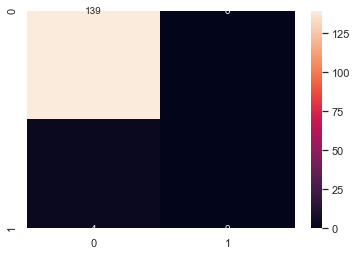

In [29]:
sns.heatmap(conf_matrix, annot=True,fmt='d')

plt.show()

In [30]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       139
         1.0       0.00      0.00      0.00         4

    accuracy                           0.97       143
   macro avg       0.49      0.50      0.49       143
weighted avg       0.94      0.97      0.96       143



In [31]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X, y)

1.0

In [32]:
importances = rf.feature_importances_
importances

array([0.2590473 , 0.24398504, 0.28475357, 0.21221409])